In [82]:
import json
import pandas as pd

# Load the public cases data
with open('public_cases.json', 'r') as f:
    data = json.load(f)

# Create a structured DataFrame with separate columns for each input and output
df = pd.DataFrame([
    {
        'trip_duration_days': case['input']['trip_duration_days'],
        'miles_traveled': case['input']['miles_traveled'],
        'total_receipts_amount': case['input']['total_receipts_amount'],
        'reimbursement_amount': case['expected_output']
    }
    for case in data
])

# Display the first few rows
df.head()

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount
0,3,93.0,1.42,364.51
1,1,55.0,3.60,126.06
2,1,47.0,17.97,128.91
3,2,13.0,4.67,203.52
4,3,88.0,5.78,380.37


In [42]:
df.describe()

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,7.043000,597.41374,1211.05687,1349.114030
std,3.926139,351.29979,742.85418,470.316464
min,1.000000,5.00000,1.42000,117.240000
25%,4.000000,275.96000,530.37750,1019.297500
50%,7.000000,621.00000,1171.90000,1454.260000
75%,10.000000,893.00000,1881.10500,1711.122500
max,14.000000,1317.07000,2503.46000,2337.730000


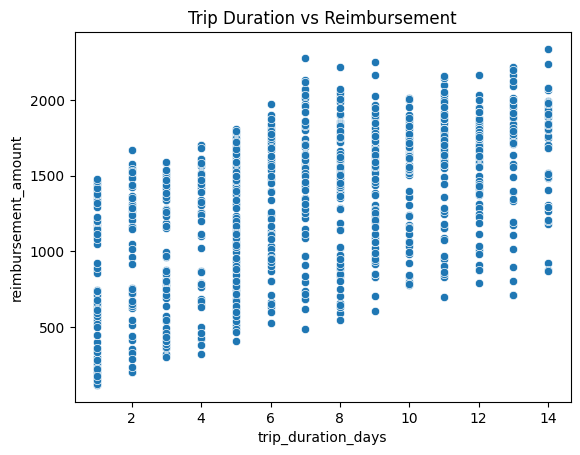

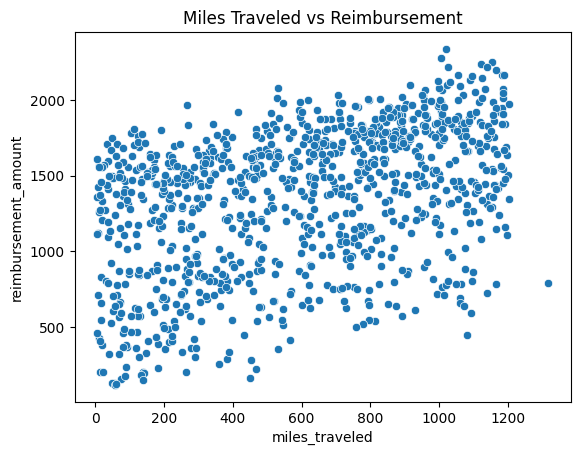

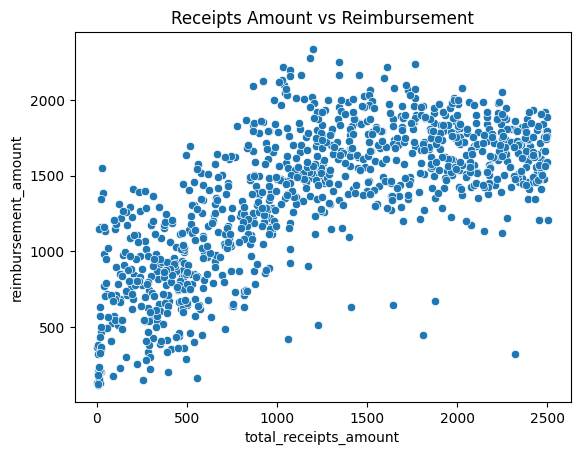

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trip duration vs reimbursement
sns.scatterplot(x='trip_duration_days', y='reimbursement_amount', data=df)
plt.title('Trip Duration vs Reimbursement')
plt.show()

# Miles traveled vs reimbursement
sns.scatterplot(x='miles_traveled', y='reimbursement_amount', data=df)
plt.title('Miles Traveled vs Reimbursement')
plt.show()

# Receipts amount vs reimbursement
sns.scatterplot(x='total_receipts_amount', y='reimbursement_amount', data=df)
plt.title('Receipts Amount vs Reimbursement')
plt.show()

                       trip_duration_days  miles_traveled  \
trip_duration_days               1.000000        0.046050   
miles_traveled                   0.046050        1.000000   
total_receipts_amount            0.132897        0.131548   
reimbursement_amount             0.513509        0.431662   

                       total_receipts_amount  reimbursement_amount  
trip_duration_days                  0.132897              0.513509  
miles_traveled                      0.131548              0.431662  
total_receipts_amount               1.000000              0.704035  
reimbursement_amount                0.704035              1.000000  


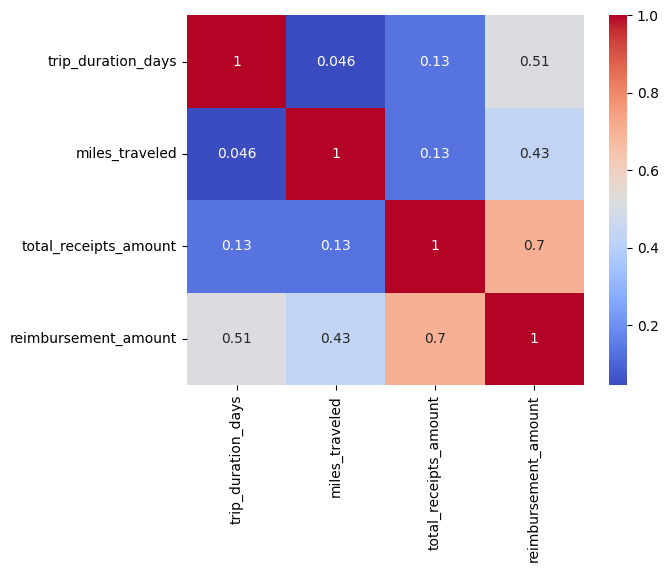

In [84]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [86]:
# Reimbursement per day
df['reimbursement_per_day'] = df['reimbursement_amount'] / df['trip_duration_days']

# Reimbursement per mile
df['reimbursement_per_mile'] = df['reimbursement_amount'] / df['miles_traveled']

# Reimbursement as a percentage of receipts
df['reimbursement_pct_receipts'] = df['reimbursement_amount'] / df['total_receipts_amount']

# Receipts per day
df['receipts_per_day'] = df['total_receipts_amount'] / df['trip_duration_days']

# Receipts per mile
df['receipts_per_mile'] = df['total_receipts_amount'] / df['miles_traveled']

# Show the first few rows of new features
df.head()

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount,reimbursement_per_day,reimbursement_per_mile,reimbursement_pct_receipts,receipts_per_day,receipts_per_mile
0,3,93.0,1.42,364.51,121.503333,3.919462,256.697183,0.473333,0.015269
1,1,55.0,3.60,126.06,126.060000,2.292000,35.016667,3.600000,0.065455
2,1,47.0,17.97,128.91,128.910000,2.742766,7.173623,17.970000,0.382340
3,2,13.0,4.67,203.52,101.760000,15.655385,43.580300,2.335000,0.359231
4,3,88.0,5.78,380.37,126.790000,4.322386,65.807958,1.926667,0.065682


In [46]:
df.describe()

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount,reimbursement_per_day,reimbursement_per_mile,reimbursement_pct_receipts,receipts_per_day,receipts_per_mile
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.043000,597.41374,1211.05687,1349.114030,284.712032,6.345393,2.801597,285.706081,6.052064
std,3.926139,351.29979,742.85418,470.316464,268.568261,20.496601,10.158244,381.707793,21.148138
min,1.000000,5.00000,1.42000,117.240000,54.634615,0.359601,0.138704,0.473333,0.015269
25%,4.000000,275.96000,530.37750,1019.297500,142.231429,1.657375,0.856555,85.845821,0.980573
50%,7.000000,621.00000,1171.90000,1454.260000,187.578750,2.221153,1.250576,169.089176,1.952640
75%,10.000000,893.00000,1881.10500,1711.122500,312.404000,3.822418,1.858830,300.643071,3.703540
max,14.000000,1317.07000,2503.46000,2337.730000,1475.400000,322.050000,256.697183,2452.850000,296.514286


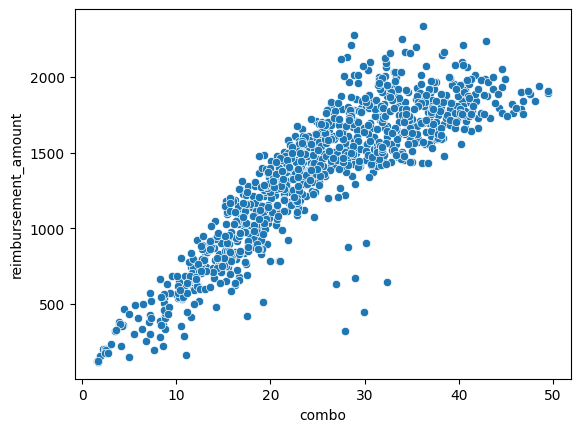

In [87]:
df['combo'] = 1.0 * df['trip_duration_days'] + 0.01 * df['miles_traveled'] + 0.01 * df['total_receipts_amount']
sns.scatterplot(x='combo', y='reimbursement_amount', data=df)
plt.show()

In [88]:
from sklearn.linear_model import LinearRegression

X = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df['reimbursement_amount']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 266.70768050486345
Coefficients: [50.05048622  0.44564529  0.38286076]


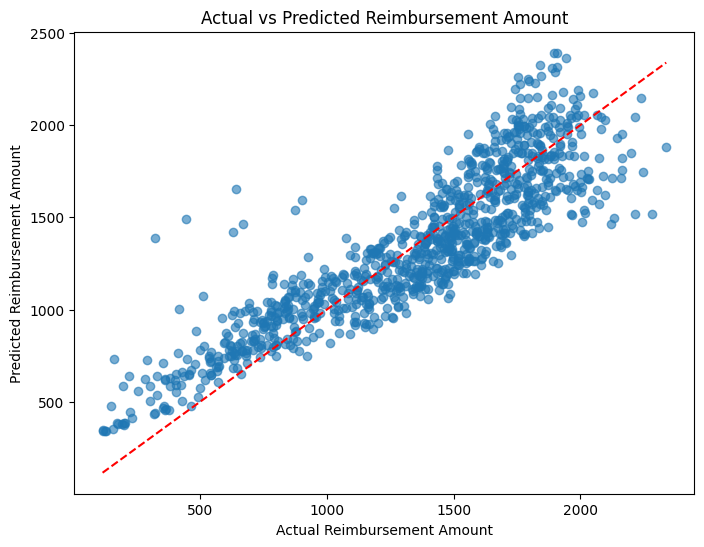

In [89]:
import matplotlib.pyplot as plt

# Predict reimbursement amounts using the model
y_pred = model.predict(X)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted Reimbursement Amount')
plt.title('Actual vs Predicted Reimbursement Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.show()

In [90]:
import numpy as np

# Interaction terms
df['miles_per_day'] = df['miles_traveled'] / df['trip_duration_days']
df['receipts_per_day'] = df['total_receipts_amount'] / df['trip_duration_days']

# Nonlinearities
df['log_miles'] = np.log1p(df['miles_traveled'])
df['log_receipts'] = np.log1p(df['total_receipts_amount'])
df['days_squared'] = df['trip_duration_days'] ** 2

# Stepwise/threshold features
df['is_five_day_trip'] = (df['trip_duration_days'] == 5).astype(int)
df['is_sweet_spot_miles_per_day'] = ((df['miles_per_day'] >= 180) & (df['miles_per_day'] <= 220)).astype(int)
df['low_receipts_penalty'] = (df['total_receipts_amount'] < 75 * df['trip_duration_days']).astype(int)
df['high_receipts_penalty'] = (df['total_receipts_amount'] > 120 * df['trip_duration_days']).astype(int)

In [91]:
from sklearn.linear_model import LinearRegression

features = [
    'trip_duration_days', 'miles_traveled', 'total_receipts_amount',
    'miles_per_day', 'receipts_per_day',
    'log_miles', 'log_receipts', 'days_squared',
    'is_five_day_trip', 'is_sweet_spot_miles_per_day',
    'low_receipts_penalty', 'high_receipts_penalty'
]

X2 = df[features]
y = df['reimbursement_amount']

model2 = LinearRegression()
model2.fit(X2, y)

print('Intercept:', model2.intercept_)
print('Coefficients:', dict(zip(features, model2.coef_)))

Intercept: -63.12692986667025
Coefficients: {'trip_duration_days': np.float64(109.59606008141668), 'miles_traveled': np.float64(0.5169772838153764), 'total_receipts_amount': np.float64(0.1657480089701842), 'miles_per_day': np.float64(-0.3459329687298075), 'receipts_per_day': np.float64(0.24117671010465716), 'log_miles': np.float64(-7.061852486430072), 'log_receipts': np.float64(57.04268772809325), 'days_squared': np.float64(-3.35271785025456), 'is_five_day_trip': np.float64(26.002100915273715), 'is_sweet_spot_miles_per_day': np.float64(-14.28544640095452), 'low_receipts_penalty': np.float64(-189.92257639587848), 'high_receipts_penalty': np.float64(42.14464878524776)}


MAE: 152.38589276371724
R2 Score: 0.8306977511354693


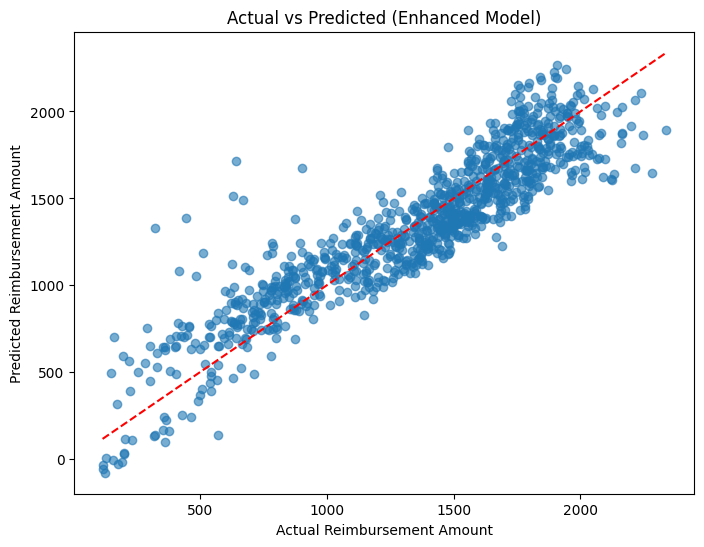

In [92]:
y_pred2 = model2.predict(X2)

from sklearn.metrics import mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y, y_pred2))
print("R2 Score:", r2_score(y, y_pred2))

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred2, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted Reimbursement Amount')
plt.title('Actual vs Predicted (Enhanced Model)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [93]:
df['error'] = y - y_pred2
df.sort_values('error', key=abs, ascending=False).head(10)

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount,reimbursement_per_day,reimbursement_per_mile,reimbursement_pct_receipts,receipts_per_day,receipts_per_mile,combo,miles_per_day,log_miles,log_receipts,days_squared,is_five_day_trip,is_sweet_spot_miles_per_day,low_receipts_penalty,high_receipts_penalty,error
683,8,795.00,1645.99,644.69,80.586250,0.810931,0.391673,205.748750,2.070428,32.4099,99.375000,6.679599,7.406705,64,0,0,0,1,-1070.911478
151,4,69.00,2321.49,322.00,80.500000,4.666667,0.138704,580.372500,33.644783,27.9049,17.250000,4.248495,7.750395,16,0,0,0,1,-1008.318363
995,1,1082.00,1809.49,446.94,446.940000,0.413068,0.246998,1809.490000,1.672357,29.9149,1082.000000,6.987490,7.501353,1,0,0,0,1,-938.269920
547,8,482.00,1411.49,631.81,78.976250,1.310809,0.447619,176.436250,2.928402,26.9349,60.250000,6.180017,7.253109,64,0,0,0,1,-884.341306
710,5,516.00,1878.49,669.85,133.970000,1.298159,0.356590,375.698000,3.640484,28.9449,103.200000,6.248043,7.538756,25,1,0,0,1,-818.265888
366,11,740.00,1171.99,902.09,82.008182,1.219041,0.769708,106.544545,1.583770,30.1199,67.272727,6.608001,7.067311,121,0,0,0,0,-770.376986
114,5,195.73,1228.49,511.23,102.246000,2.611914,0.416145,245.698000,6.276452,19.2422,39.146000,5.281832,7.114355,25,1,0,0,1,-676.997048
243,4,286.00,1063.49,418.17,104.542500,1.462133,0.393205,265.872500,3.718497,17.4949,71.500000,5.659482,6.970251,16,0,0,0,1,-666.738802
148,7,1006.00,1181.33,2279.82,325.688571,2.266223,1.929876,168.761429,1.174284,28.8733,143.714286,6.914731,7.075242,49,0,0,0,1,636.284945
433,5,210.00,710.49,483.34,96.668000,2.301619,0.680291,142.098000,3.383286,14.2049,42.000000,5.351858,6.567361,25,1,0,0,1,-568.737161


MAE (Tree): 96.08462967649564
R2 Score (Tree): 0.9130312510850914


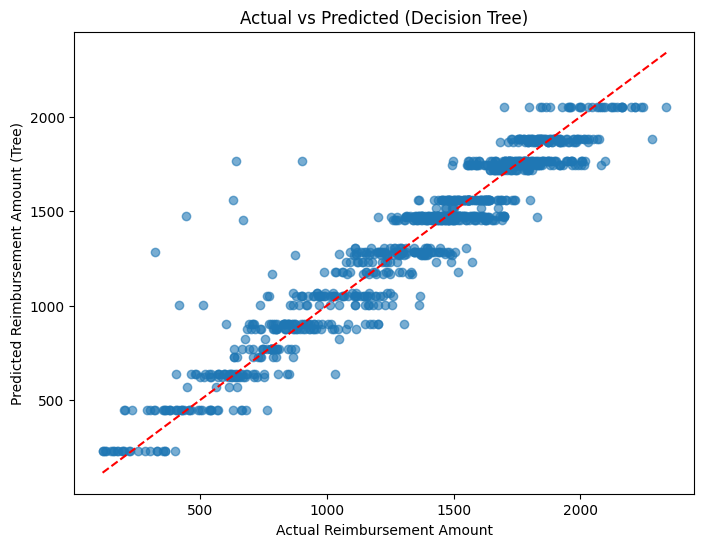

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X2, y)
y_pred_tree = tree.predict(X2)

from sklearn.metrics import mean_absolute_error, r2_score
print("MAE (Tree):", mean_absolute_error(y, y_pred_tree))
print("R2 Score (Tree):", r2_score(y, y_pred_tree))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_tree, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted Reimbursement Amount (Tree)')
plt.title('Actual vs Predicted (Decision Tree)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [95]:
importances = tree.feature_importances_
for name, importance in zip(features, importances):
   print(f"{name}: {importance:.3f}")

trip_duration_days: 0.011
miles_traveled: 0.077
total_receipts_amount: 0.026
miles_per_day: 0.001
receipts_per_day: 0.009
log_miles: 0.043
log_receipts: 0.648
days_squared: 0.185
is_five_day_trip: 0.000
is_sweet_spot_miles_per_day: 0.000
low_receipts_penalty: 0.000
high_receipts_penalty: 0.000


MAE (Random Forest): 53.57497408771524
R2 Score (Random Forest): 0.9709529221053934


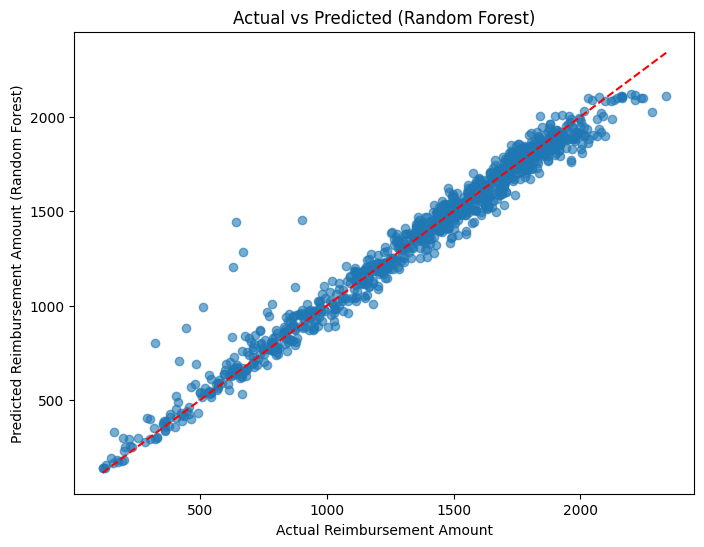

trip_duration_days: 0.091
miles_traveled: 0.071
total_receipts_amount: 0.378
miles_per_day: 0.010
receipts_per_day: 0.014
log_miles: 0.062
log_receipts: 0.272
days_squared: 0.101
is_five_day_trip: 0.001
is_sweet_spot_miles_per_day: 0.000
low_receipts_penalty: 0.000
high_receipts_penalty: 0.000


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Fit the random forest
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X2, y)

# Predict
y_pred_rf = rf.predict(X2)

# Evaluate
print("MAE (Random Forest):", mean_absolute_error(y, y_pred_rf))
print("R2 Score (Random Forest):", r2_score(y, y_pred_rf))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_rf, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted Reimbursement Amount (Random Forest)')
plt.title('Actual vs Predicted (Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Feature importances
importances = rf.feature_importances_
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.3f}")

In [97]:
def apply_cap_and_penalty(pred, days, miles, receipts):
    cap = 120 * days + 0.5 * miles
    if pred > cap * 1.5:
        return cap
    else:
        return pred

# y_pred_rf is your Random Forest predictions
y_pred_capped = [
    apply_cap_and_penalty(p, d, m, r)
    for p, d, m, r in zip(y_pred_rf, df['trip_duration_days'], df['miles_traveled'], df['total_receipts_amount'])
]

In [98]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE (Capped):", mean_absolute_error(y, y_pred_capped))
print("R2 Score (Capped):", r2_score(y, y_pred_capped))

MAE (Capped): 242.45257204977756
R2 Score (Capped): 0.28590153532733753


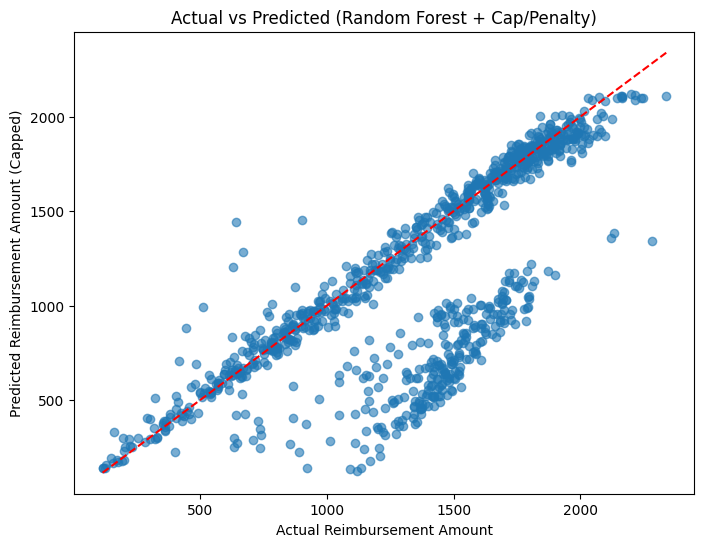

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_capped, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted Reimbursement Amount (Capped)')
plt.title('Actual vs Predicted (Random Forest + Cap/Penalty)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [100]:
capped_count = sum([pred != capped for pred, capped in zip(y_pred_rf, y_pred_capped)])
print(f"Capped {capped_count} out of {len(y_pred_rf)} predictions")

Capped 281 out of 1000 predictions


MAE (Gradient Boosting): 21.765341525821228
R2 Score (Gradient Boosting): 0.9963596837095279


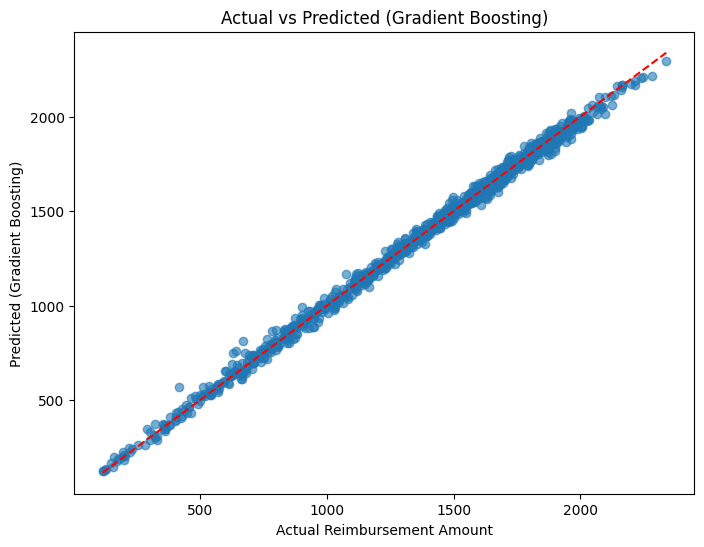

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
gbr.fit(X2, y)

# Predict
y_pred_gbr = gbr.predict(X2)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE (Gradient Boosting):", mean_absolute_error(y, y_pred_gbr))
print("R2 Score (Gradient Boosting):", r2_score(y, y_pred_gbr))

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_gbr, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted (Gradient Boosting)')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [23]:
import joblib

# Save the trained Gradient Boosting model to a file
joblib.dump(gbr, 'reimbursement_model_gb.joblib')

['reimbursement_model_gb.joblib']

In [102]:
# Calculate errors for Gradient Boosting predictions
df['error_gbr'] = y - y_pred_gbr
# Show top 10 high-error cases
high_error_cases = df.iloc[df['error_gbr'].abs().sort_values(ascending=False).index[:10]]
display(high_error_cases[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'reimbursement_amount', 'error_gbr']])

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount,error_gbr
243,4,286.0,1063.49,418.17,-154.276134
710,5,516.0,1878.49,669.85,-144.864795
547,8,482.0,1411.49,631.81,-118.743052
683,8,795.0,1645.99,644.69,-113.870588
366,11,740.0,1171.99,902.09,-93.927022
614,11,816.0,544.99,1077.12,-90.041871
48,11,916.0,1036.91,2098.07,86.837900
369,4,825.0,874.99,784.52,-83.453020
692,10,834.0,1820.80,1883.49,82.890616
955,7,756.0,1473.59,1961.96,80.638472


In [103]:
# Example: Compare to similar cases for the first high-error case
case = high_error_cases.iloc[0]
similar = df[
    (df['trip_duration_days'].between(case['trip_duration_days']-1, case['trip_duration_days']+1)) &
    (df['miles_traveled'].between(case['miles_traveled']-100, case['miles_traveled']+100)) &
    (df['total_receipts_amount'].between(case['total_receipts_amount']-200, case['total_receipts_amount']+200))
]
display(similar[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'reimbursement_amount', 'error_gbr']])

,trip_duration_days,miles_traveled,total_receipts_amount,reimbursement_amount,error_gbr
32,5,262.00,1173.79,1485.59,37.942320
39,5,249.00,873.75,1185.24,9.939785
114,5,195.73,1228.49,511.23,-59.956818
195,5,285.00,974.73,1282.84,14.371026
243,4,286.00,1063.49,418.17,-154.276134
414,3,196.00,1211.68,1229.87,-11.748780
419,3,289.00,1245.67,1279.31,-58.061927
675,3,186.00,1068.31,1152.04,26.109499
942,3,280.00,1090.37,1256.92,-11.394691
984,3,278.00,994.90,1167.78,69.677738


In [105]:
df['receipts_per_day'] = df['total_receipts_amount'] / df['trip_duration_days']
df['receipts_per_mile'] = df['total_receipts_amount'] / df['miles_traveled']

In [106]:
display(high_error_cases[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'receipts_per_day', 'receipts_per_mile', 'reimbursement_amount', 'error_gbr']])
display(similar[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'receipts_per_day', 'receipts_per_mile', 'reimbursement_amount', 'error_gbr']])

,trip_duration_days,miles_traveled,total_receipts_amount,receipts_per_day,receipts_per_mile,reimbursement_amount,error_gbr
243,4,286.0,1063.49,265.872500,3.718497,418.17,-154.276134
710,5,516.0,1878.49,375.698000,3.640484,669.85,-144.864795
547,8,482.0,1411.49,176.436250,2.928402,631.81,-118.743052
683,8,795.0,1645.99,205.748750,2.070428,644.69,-113.870588
366,11,740.0,1171.99,106.544545,1.583770,902.09,-93.927022
614,11,816.0,544.99,49.544545,0.667880,1077.12,-90.041871
48,11,916.0,1036.91,94.264545,1.131998,2098.07,86.837900
369,4,825.0,874.99,218.747500,1.060594,784.52,-83.453020
692,10,834.0,1820.80,182.080000,2.183213,1883.49,82.890616
955,7,756.0,1473.59,210.512857,1.949193,1961.96,80.638472


,trip_duration_days,miles_traveled,total_receipts_amount,receipts_per_day,receipts_per_mile,reimbursement_amount,error_gbr
32,5,262.00,1173.79,234.758000,4.480115,1485.59,37.942320
39,5,249.00,873.75,174.750000,3.509036,1185.24,9.939785
114,5,195.73,1228.49,245.698000,6.276452,511.23,-59.956818
195,5,285.00,974.73,194.946000,3.420105,1282.84,14.371026
243,4,286.00,1063.49,265.872500,3.718497,418.17,-154.276134
414,3,196.00,1211.68,403.893333,6.182041,1229.87,-11.748780
419,3,289.00,1245.67,415.223333,4.310277,1279.31,-58.061927
675,3,186.00,1068.31,356.103333,5.743602,1152.04,26.109499
942,3,280.00,1090.37,363.456667,3.894179,1256.92,-11.394691
984,3,278.00,994.90,331.633333,3.578777,1167.78,69.677738


In [107]:
df['high_receipts_per_day_4day'] = ((df['trip_duration_days'] == 4) & (df['receipts_per_day'] > 250)).astype(int)

In [108]:
df['high_receipts_per_mile_4day'] = ((df['trip_duration_days'] == 4) & (df['receipts_per_mile'] > 3.5)).astype(int)

In [109]:
# Add new features to your feature list
features_extended = features + ['high_receipts_per_day_4day', 'high_receipts_per_mile_4day']

# Prepare new feature matrix
X3 = df[features_extended]

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

gbr2 = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
gbr2.fit(X3, y)

# Predict
y_pred_gbr2 = gbr2.predict(X3)

MAE (GBR + new features): 20.874746568002543
R2 Score (GBR + new features): 0.9967425513792342


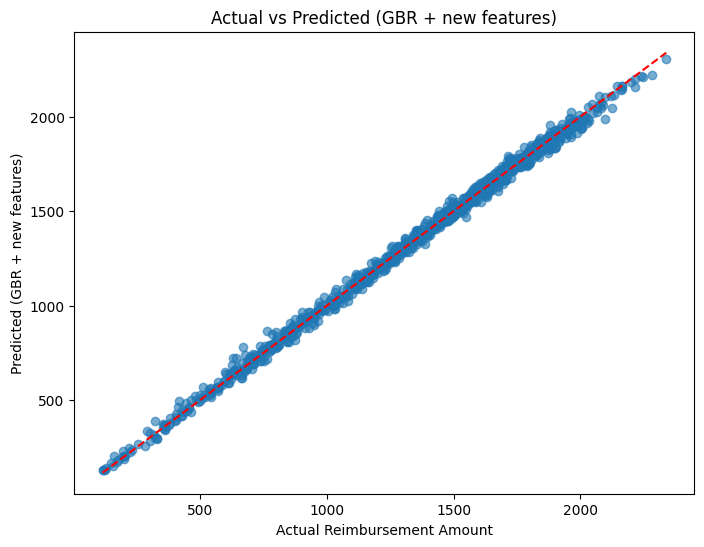

In [111]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE (GBR + new features):", mean_absolute_error(y, y_pred_gbr2))
print("R2 Score (GBR + new features):", r2_score(y, y_pred_gbr2))

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_gbr2, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted (GBR + new features)')
plt.title('Actual vs Predicted (GBR + new features)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [112]:
df['error_gbr2'] = y - y_pred_gbr2
high_error_cases2 = df.iloc[df['error_gbr2'].abs().sort_values(ascending=False).index[:10]]
display(high_error_cases2[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'receipts_per_day', 'receipts_per_mile', 'reimbursement_amount', 'error_gbr2']])

,trip_duration_days,miles_traveled,total_receipts_amount,receipts_per_day,receipts_per_mile,reimbursement_amount,error_gbr2
710,5,516.0,1878.49,375.698000,3.640484,669.85,-114.549359
48,11,916.0,1036.91,94.264545,1.131998,2098.07,111.413673
89,5,754.0,489.99,97.998000,0.649854,765.13,-103.813928
547,8,482.0,1411.49,176.436250,2.928402,631.81,-93.101794
243,4,286.0,1063.49,265.872500,3.718497,418.17,-79.548021
683,8,795.0,1645.99,205.748750,2.070428,644.69,-79.208742
959,13,997.0,920.48,70.806154,0.923250,2124.16,78.333702
223,5,516.0,1450.67,290.134000,2.811376,1547.50,77.740196
562,5,716.0,1111.23,222.246000,1.551997,1492.08,-77.352232
865,10,895.0,937.46,93.746000,1.047441,1714.80,-75.190766


In [113]:
df['high_receipts_per_day_all'] = (df['receipts_per_day'] > 250).astype(int)

In [114]:
df['receipts_per_day_bin'] = pd.cut(df['receipts_per_day'], bins=[0, 100, 150, 200, 250, 300, 10000], labels=False)

In [115]:
df['receipts_per_day_times_days'] = df['receipts_per_day'] * df['trip_duration_days']

In [116]:
df['receipts_per_day_squared'] = df['receipts_per_day'] ** 2

In [117]:
df['receipts_ends_49_99'] = df['total_receipts_amount'].apply(lambda x: int(str(x)[-2:] in ['49', '99']))

In [118]:
# Add all new features to your feature list
features_final = features_extended + [
    'high_receipts_per_day_all',
    'receipts_per_day_bin',
    'receipts_per_day_times_days',
    'receipts_per_day_squared',
    'receipts_ends_49_99'
]

# Prepare the new feature matrix
X_final = df[features_final]

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_final = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
gbr_final.fit(X_final, y)

# Predict
y_pred_gbr_final = gbr_final.predict(X_final)

MAE (GBR Final): 18.04161568836422
R2 Score (GBR Final): 0.997524104579074


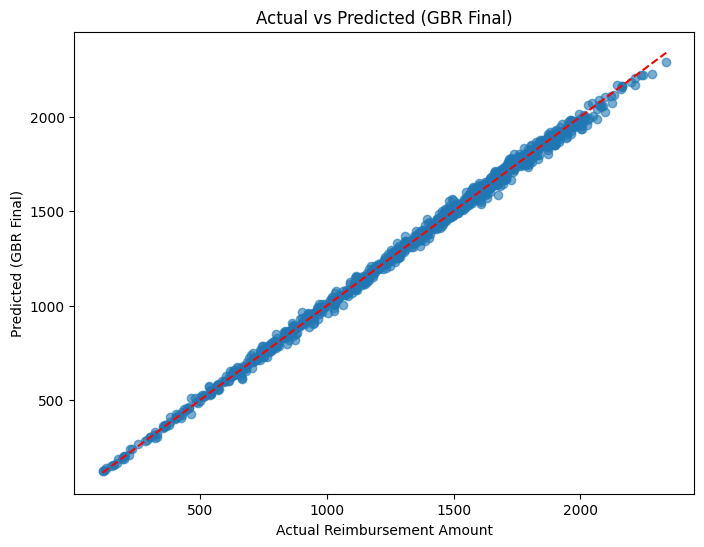

In [120]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE (GBR Final):", mean_absolute_error(y, y_pred_gbr_final))
print("R2 Score (GBR Final):", r2_score(y, y_pred_gbr_final))

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_gbr_final, alpha=0.6)
plt.xlabel('Actual Reimbursement Amount')
plt.ylabel('Predicted (GBR Final)')
plt.title('Actual vs Predicted (GBR Final)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [122]:
df['error_gbr_final'] = y - y_pred_gbr_final
high_error_cases_final = df.iloc[df['error_gbr_final'].abs().sort_values(ascending=False).index[:10]]
display(high_error_cases_final[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'receipts_per_day', 'receipts_per_mile', 'reimbursement_amount', 'error_gbr_final']])

,trip_duration_days,miles_traveled,total_receipts_amount,receipts_per_day,receipts_per_mile,reimbursement_amount,error_gbr_final
907,5,840.0,941.55,188.310000,1.120893,1676.48,89.977635
134,7,1010.0,1514.03,216.290000,1.499040,2063.98,76.360640
555,10,793.0,1422.29,142.229000,1.793556,2007.62,75.540465
48,11,916.0,1036.91,94.264545,1.131998,2098.07,74.880412
562,5,716.0,1111.23,222.246000,1.551997,1492.08,-73.309446
462,11,667.0,2221.67,201.970000,3.330840,1872.89,71.242043
613,8,544.0,1279.51,159.938750,2.352040,1483.77,-71.191647
514,4,463.0,1963.41,490.852500,4.240626,1607.34,71.120422
51,9,954.0,1483.39,164.821111,1.554916,2024.20,68.178489
716,5,831.0,432.80,86.560000,0.520818,901.36,-65.740133


In [186]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

gbr_huber = GradientBoostingRegressor(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.05,
    loss='huber',  # Try 'quantile' as well
    alpha=0.999,     # Only for 'quantile'
    subsample=0.8,
    random_state=42
)
gbr_huber.fit(X, y)
y_pred_huber = gbr_huber.predict(X)
print("MAE (Huber GBR):", mean_absolute_error(y, y_pred_huber))
print("R2 Score (Huber GBR):", r2_score(y, y_pred_huber))

MAE (Huber GBR): 1.0055006574692136
R2 Score (Huber GBR): 0.9999933306957197


In [185]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
gbr_poly = GradientBoostingRegressor(n_estimators=2000, max_depth=7, learning_rate=0.05, random_state=42)
gbr_poly.fit(X_poly, y)
y_pred_poly = gbr_poly.predict(X_poly)
print("MAE (Poly GBR):", mean_absolute_error(y, y_pred_poly))
print("R2 Score (Poly GBR):", r2_score(y, y_pred_poly))

MAE (Poly GBR): 0.015544424252981259
R2 Score (Poly GBR): 0.9999999982303257


In [187]:
import numpy as np
X_log = X.copy()
X_log['log_receipts'] = np.log1p(X_log['total_receipts_amount'])
X_log['log_miles'] = np.log1p(X_log['miles_traveled'])
gbr_log = GradientBoostingRegressor(n_estimators=2000, max_depth=7, learning_rate=0.05, random_state=42)
gbr_log.fit(X_log, y)
y_pred_log = gbr_log.predict(X_log)
print("MAE (Log GBR):", mean_absolute_error(y, y_pred_log))
print("R2 Score (Log GBR):", r2_score(y, y_pred_log))

MAE (Log GBR): 0.08133103883794474
R2 Score (Log GBR): 0.9999999462554637


In [189]:
import joblib

# Save the trained Gradient Boosting model to a file
joblib.dump(gbr_log, 'reimbursement_model_gbr_log.joblib')

['reimbursement_model_gbr_log.joblib']